# 1) 6개의 Toy Data에 대해 다양한 Clustering 적용해보기
### 아래 예시와 같이 다양하게 자신의 생각 도출하기
 - 지역적 패턴이 존재하는 DataSet에는 XX Clustering 방법을 쓰면 좋을 것 같다
 - XX Clustering은 길게 늘어진 데이터에 대해 잘 분류하는 것 같다
 - XX Clustering은 군집의 개수를 미리 정해야 해서 ~~ 경향이 있는 것 같다
 
### 조건
 - (기본)우리가 배운 3가지 Clustering 
 - 데이터 간/클러스터 간 거리 측정 방식 다양하게 사용해서 비교 
 - 새로운 Clustering 방법 사용하기(최소 2개 이상) 

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from itertools import cycle, islice

In [2]:
plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus=False)

### ToyData 만들기

In [3]:
# 다른 모양 Toy Data 6개 만들기
n_samples = 1500

# Toy Data 1
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
# Toy Data 2
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
# Toy Data 3
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
# Toy Data 4
no_structure = np.random.rand(n_samples, 2), None

# Anisotropically(비등방성: 방향에 따라 물체의 물리적 성질이 다른 것) distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
# Toy Data 5
aniso = (X_aniso, y)

# blobs with varied variances
# Toy Data 6
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

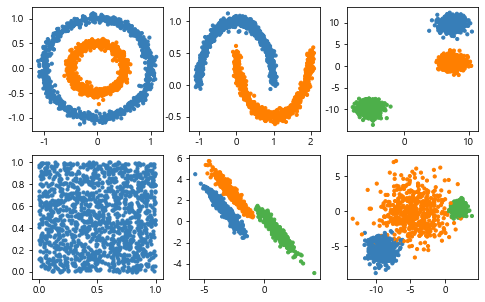

In [4]:
# 데이터셋 시각화

X1, y1 = noisy_circles
X2, y2 = noisy_moons
X3, y3 = blobs
X4, y4 = no_structure
X5, y5 = aniso
X6, y6 = varied

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8,5))

# noisy_circles
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y1) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
axes[0][0].scatter(X1[:, 0], X1[:, 1], s=10, color=colors[y1])

# noisy_moons
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y2) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
axes[0][1].scatter(X2[:, 0], X2[:, 1], s=10, color=colors[y2])

# blobs
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y3) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
axes[0][2].scatter(X3[:, 0], X3[:, 1], s=10, color=colors[y3])


# no_structure
axes[1][0].scatter(X4[:, 0], X4[:, 1], s=10, color='#377eb8')

# aniso
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y5) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
axes[1][1].scatter(X5[:, 0], X5[:, 1], s=10, color=colors[y5])

# varied
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y6) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
axes[1][2].scatter(X6[:, 0], X6[:, 1], s=10, color=colors[y6])

plt.show()

# 2) (Agglomerative) Hierarchical Clustering

#### (AgglomerativeClustering에서 제공하는) 거리측정 방식: : "ward", "average", "complete", "single"

- `ward` minimizes the variance of the clusters being merged.
- `average` uses the **average** of the distances of each observation of
  the two sets.
- `complete` or maximum linkage uses the **maximum** distances between
  all observations of the two sets.
- `single` uses the **minimum** of the distances between all observations
  of the two sets.

In [5]:
from sklearn.cluster import AgglomerativeClustering

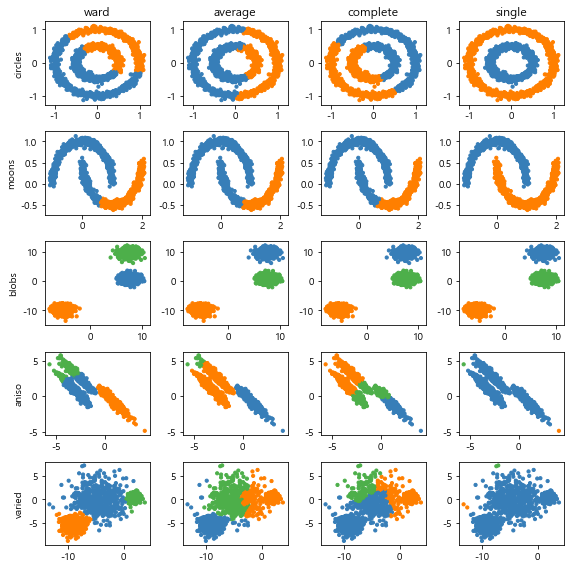

In [6]:
X = [X1, X2, X3, X5, X6]
X_name = ['circles', 'moons', 'blobs', 'aniso', 'varied']
method = ['ward', 'average', 'complete', 'single']


fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(8, 8))

# cluster가 2개인 데이터셋: X1, X2
for i in range(2):
    for j in range(4):
        
        agg = AgglomerativeClustering(n_clusters=2, linkage=method[j])
        y_pred = agg.fit_predict(X[i])
        
        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
        
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        
        axes[i][j].scatter(X[i][:, 0], X[i][:, 1], s=10, color=colors[y_pred])
        axes[0][j].set_title('{}'.format(method[j]))
        
        axes[i][0].set_ylabel(X_name[i])

# cluster가 3개인 데이터셋: X3, X5, X6         
for i in range(2,5):
    for j in range(4):

        agg = AgglomerativeClustering(n_clusters=3, linkage=method[j])
        y_pred = agg.fit_predict(X[i])

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
        
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        
        axes[i][j].scatter(X[i][:, 0], X[i][:, 1], s=10, color=colors[y_pred])
        axes[0][j].set_title('{}'.format(method[j]))
        
        axes[i][0].set_ylabel(X_name[i])

fig.tight_layout()
plt.show()

- `circles`, `moons` 데이터의 경우에는 **single linkage**가 가장 잘 군집되었음을 볼 수 있습니다. 즉 single linkage는 길게 늘어진 형태의 데이터에 적절하다는 것을 알 수 있었습니다. 그러나 aniso와 varied에서는 군집이 잘 되지 않았는데, 군집간 거리가 밀접한 경우에는 single linkage 방법이 좋지 않은 것 같습니다. 

- `varied` 데이터의 경우에는 **ward > average > complete** 순으로 군집이 잘 됨을 볼 수 있습니다. 

- `aniso` 데이터의 경우에는 hierarchical clustering algorithm을 사용하는 것이 적절하지 않은 것 같습니다. 

- Hierarchical Clustering의 특징 중 하나는, 사전에 군집의 개수를 정할 필요가 없다는 장점입니다. <br>
그러나 AgglomerativeClustering 함수를 쓰기 위해서는 parameter로 군집의 개수를 정해주어야 했습니다. <br>
(cf. n_clusters=None으로 하고 대신 distance_threshold를 지정해주면 model이 해당 기준에 맞게 군집의 개수를 선정합니다.) <br>
따라서, 실제 데이터의 경우에는 먼저 dendrogram을 통해 군집의 개수 또는 군집 간 거리를 확인하고 이후 작업으로 clustering을 해줄 필요가 있습니다.  

# 3) K-Means Clustering

### 초기값/update Centroid
 - `랜덤 초기화`: 가장 많이 쓰이는 초기화 기법. 각 데이터들을 임의의 클러스터에 배당한 후, 각 클러스터에 배당된 점들의 평균 값을 초기 $\mu_i$로 설정합니다. 데이터 순서에 대해서 독립적이며, 초기 클러스터가 각 데이터들에 대해 고르게 분포되기 때문에 **각 초기 클러스터의 무게중심들이 데이터 집합의 중심에 가깝게 위치하는 경향을 띕니다.**

<br>

- `Forgy 알고리즘`: 현재 주로 쓰이는 초기화 기법 중 하나. 데이터 집합으로부터 임의의 k개의 데이터를 선택하여 각 클러스터의 초기 $\mu_i$로 설정합니다. 중심점을 할당한 후, 중심점과의 거리를 기준으로 군집을 할당해 줍니다. 그 후 형성된 군집의 무게중심에 대응하는 벡터를 중심벡터로 다시 할당해줍니다. 이 때 더이상 중심점이 변화하지 않을 때까지 반복해줍니다. 랜덤 초기화와 마찬가지로 데이터 순서에 대해 독립적이며, 초기 클러스터가 임의의 k개의 점들에 의해 설정되기 때문에 **각 클러스터의 무게중심이 중심으로부터 퍼져있는 경향을 띕니다.** 

<br>
 
 - `MacQueen 알고리즘`: Forgy 알고리즘과 마찬가지로 데이터 집합으로부터 임의의 k개의 데이터를 선택하여 각 클러스터의 초기 $\mu_i$로 설정합니다. 대신 **각 샘플벡터들이 새롭게 군집으로 할당될 때마다 무게중심이 업데이트 됩니다.** MacQueen 알고리즘의 경우 **최종 수렴에 가까운 클러스터를 찾는 것이 비교적 빠르나 최종 수렴에 해당하는 클러스터를 찾는 것은 매우 느립니다.** 

<br>
 
 - `Kaufman 알고리즘`: 전체 데이터 집합 중 가장 중심에 위치한 데이터를 첫번째 $\mu_i$로 설정합니다. 이후 선택되지 않은 데이터 집합에 근접하게 위치한 데이터를 또 다른 $\mu_i$로 설정합니다. 총 k개의 $\mu_i$가 설정될 때까지 반복하는 기법입니다. Kaufman 알고리즘은 초기 클러스터링과 데이터 순서에 대해 비교적 독립적이기 때문에 다른 초기화 기법보다 월등한 성능을 보여줍니다. 

<br>
 
 - `K-Means++`: K-means는 초기값이 제대로 설정되지 않으면 불안정한 군집화 결과를 학습한다고 알려져 있습니다. 이 때 **학습결과가 좋지 않는 경우는 보통 초기값이 비슷한 점들로 여러개 선택된 경우입니다.** 이 경우만 아니라면 K-means는 빠른 수렴속도와 안정적인 성능을 보여줍니다. 그렇기 때문에 서로 거리가 먼 초기값들을 선택하려는 연구가 진행되었고 그 중에서도 널리 알려진 방법이 K-means++ 입니다. 이는 **되도록 멀리 떨어진 중심위치 집합을 찾아냅니다.** <br>
K-means++은 다음과 같은 과정으로 이루어집니다. 먼저 첫 initial point $c_1$은 임의로 선택합니다. 이후의 initial point $c_t$는 이전에 선택한 $c_{t-1}$과의 거리인 $d(c_{t-1}, c_t)$가 큰 점이 높은 확률로 선택되도록 샘플링 확률 분포를 조절합니다. 이 분포에 따라 하나의 점을 선택합니다. k개의 initial points를 선택할 때까지 반복합니다. 

 
### K를 위한 Elbow Point
: WSS(군집 내 분산) 줄어드는 지점이 최적의 클러스터 개수

In [8]:
from sklearn.cluster import KMeans

#### cluster가 2개인 데이터셋: `circles`, `moons` 에 대해 elbow point 잘 찾아내는지 확인

Text(0.5, 1.0, 'Moons Elbow curve')

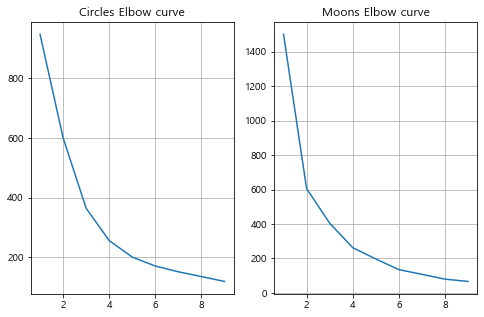

In [9]:
distorsions1 = []
distorsions2 = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X1)
    distorsions1.append(kmeans.inertia_)

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X2)
    distorsions2.append(kmeans.inertia_)    
    
fig, axes = plt.subplots(ncols=2, figsize=(8,5))

axes[0].plot(range(1,10), distorsions1)
axes[0].grid(True)
axes[0].set_title('Circles Elbow curve')

axes[1].plot(range(1,10), distorsions2)
axes[1].grid(True)
axes[1].set_title('Moons Elbow curve')

- `moons` 데이터의 경우에는 elbow point가 2로 군집의 수를 잘 선정하였습니다. 그러나 `circles` 데이터의 경우에는 elbow point가 3으로 군집의 수가 적절하게 선정되었다고 보기 어렵습니다. 

##### `circles` 데이터에 대한 k means 결과 : cluster가 2인 경우와 3인 경우

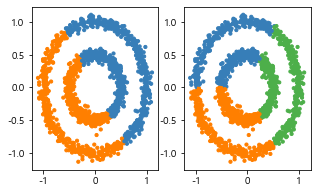

In [10]:
y_pred2 = KMeans(n_clusters=2, random_state=0).fit_predict(X1)
y_pred3 = KMeans(n_clusters=3, random_state=0).fit_predict(X1)

fig, axes = plt.subplots(ncols=2, figsize=(5,3))

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y_pred2) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
axes[0].scatter(X1[:, 0], X1[:, 1], s=10, color=colors[y_pred2])

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y_pred3) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
axes[1].scatter(X1[:, 0], X1[:, 1], s=10, color=colors[y_pred3])

plt.show()

##### `moons` 데이터에 대한 k means 결과 : cluster가 2인 경우와 3인 경우

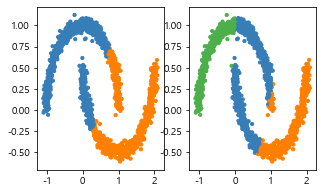

In [11]:
y_pred2 = KMeans(n_clusters=2, random_state=0).fit_predict(X2)
y_pred3 = KMeans(n_clusters=3, random_state=0).fit_predict(X2)

fig, axes = plt.subplots(ncols=2, figsize=(5,3))

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y_pred2) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
axes[0].scatter(X2[:, 0], X2[:, 1], s=10, color=colors[y_pred2])

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y_pred3) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
axes[1].scatter(X2[:, 0], X2[:, 1], s=10, color=colors[y_pred3])

plt.show()

- 그러나 kmeans의 경우 군집의 수를 2개로 잘 선정한다고 하더라도 `circles`, `moons` 데이터에 대한 군집을 잘 형성했다고 볼 수 없었습니다. 

#### cluster가 3개인 데이터셋: `blobs`, `aniso`, `varied` 에 대해 elbow point 잘 찾아내는지 확인

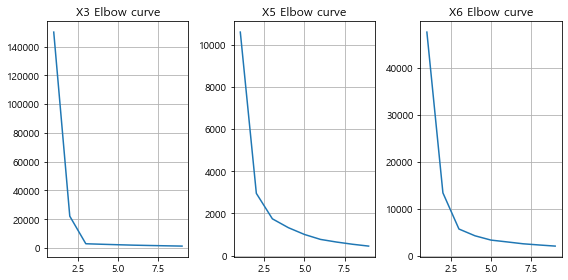

In [12]:
distorsions3 = []
distorsions5 = []
distorsions6 = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X3)
    distorsions3.append(kmeans.inertia_)

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X5)
    distorsions5.append(kmeans.inertia_)    
    
for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X6)
    distorsions6.append(kmeans.inertia_)    
    
fig, axes = plt.subplots(ncols=3, figsize=(8,4))

axes[0].plot(range(1,10), distorsions3)
axes[0].grid(True)
axes[0].set_title('X3 Elbow curve')

axes[1].plot(range(1,10), distorsions5)
axes[1].grid(True)
axes[1].set_title('X5 Elbow curve')

axes[2].plot(range(1,10), distorsions6)
axes[2].grid(True)
axes[2].set_title('X6 Elbow curve')

fig.tight_layout()

- `blobs`, `aniso`, `varied` 모두 군집의 수가 2인 곳에서 한번 꺾이는 추세를 보이고 3에서 완만해지는 양상을 보입니다. 

##### `blobs` 데이터에 대한 k means 결과 : cluster가 2인 경우와 3인 경우

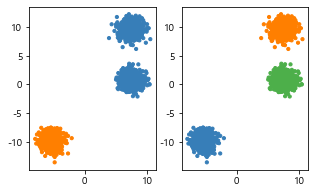

In [13]:
y_pred2 = KMeans(n_clusters=2, random_state=0).fit_predict(X3)
y_pred3 = KMeans(n_clusters=3, random_state=0).fit_predict(X3)

fig, axes = plt.subplots(ncols=2, figsize=(5,3))

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y_pred2) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
axes[0].scatter(X3[:, 0], X3[:, 1], s=10, color=colors[y_pred2])

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y_pred3) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
axes[1].scatter(X3[:, 0], X3[:, 1], s=10, color=colors[y_pred3])

plt.show()

##### `aniso` 데이터에 대한 k means 결과 : cluster가 2인 경우와 3인 경우

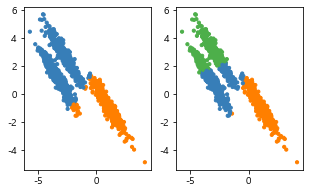

In [16]:
y_pred2 = KMeans(n_clusters=2, random_state=0).fit_predict(X5)
y_pred3 = KMeans(n_clusters=3, random_state=0).fit_predict(X5)

fig, axes = plt.subplots(ncols=2, figsize=(5,3))

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y_pred2) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
axes[0].scatter(X5[:, 0], X5[:, 1], s=10, color=colors[y_pred2])

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y_pred3) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
axes[1].scatter(X5[:, 0], X5[:, 1], s=10, color=colors[y_pred3])

plt.show()

##### `varied` 데이터에 대한 k means 결과 : cluster가 2인 경우와 3인 경우

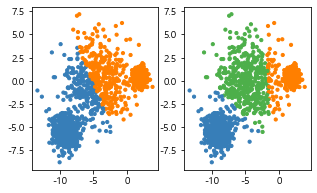

In [17]:
y_pred2 = KMeans(n_clusters=2, random_state=0).fit_predict(X6)
y_pred3 = KMeans(n_clusters=3, random_state=0).fit_predict(X6)

fig, axes = plt.subplots(ncols=2, figsize=(5,3))

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y_pred2) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
axes[0].scatter(X6[:, 0], X6[:, 1], s=10, color=colors[y_pred2])

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y_pred3) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
axes[1].scatter(X6[:, 0], X6[:, 1], s=10, color=colors[y_pred3])

plt.show()

- 완만해지는 양상을 보이는 3을 기준으로 clustering을 하는 것이 적절하였습니다. 그러나 `aniso` 데이터의 경우에는 군집의 수는 적절하나 Hierarchical Clustering과 마찬가지로 K-means 알고리즘 역시 제대로 군집을 형성할 수 없었습니다. 

# 4) DBSCAN
### Eps, min_samples(minPts)의 변화에 따른 분석

In [27]:
from sklearn.cluster import DBSCAN
import mglearn

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


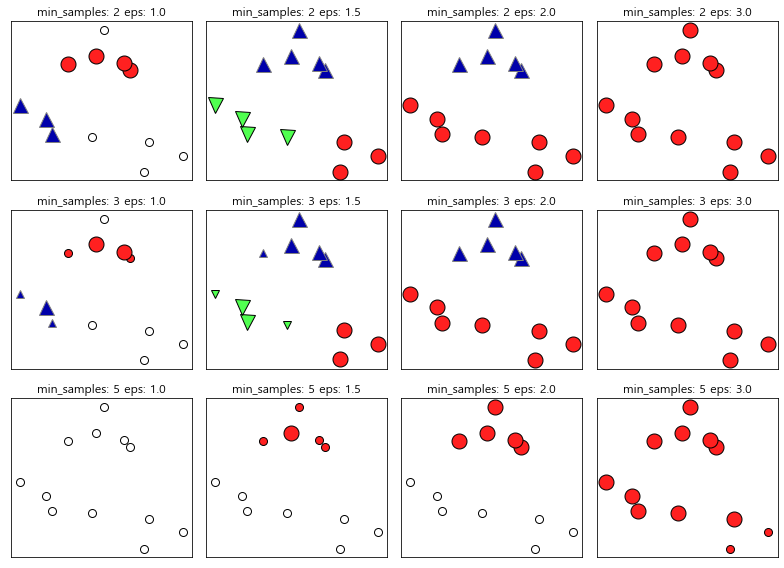

In [28]:
mglearn.plots.plot_dbscan()

- DBSCAN 알고리즘은, eps 거리 안에 있는 포인트 수가 min_samples 보다 적을 경우 그 포인트를 어떤 클래스에도 속하지 않는 잡음(noise)으로 레이블합니다. <br>
 또한, eps 거리 안에 min_samples 보다 많은 포인트가 있다면 그 포인트는 핵심 샘플로 레이블되고 새로운 클러스터 레이블로 할당됩니다. 

<br>

- DBSCAN은 클러스터의 개수를 지정할 필요는 없지만, eps와 min_samples 값을 통해 간접적으로 몇 개의 클러스터가 만들어질지 제어합니다. 위 그래프를 보면, eps값이 커지면 세분화되었던 군집이 하나의 군집으로 일반화되는 것을 볼 수 있습니다. 또한, min_samples 값이 커지면 noise로 판단될 가능성이 높아지면서 군집의 개수가 줄어드는 것을 볼 수 있습니다. 

<br>

- 적절한 eps 값을 쉽게 찾으려면 StandardScaler나 MinMaxScaler로 모든 특성의 scale을 비슷한 범위로 조정해주는 것이 좋습니다. 

In [30]:
from sklearn.preprocessing import StandardScaler

In [90]:
# 데이터 scaling 
scaler = StandardScaler()
scaler1 = scaler.fit(X1)
X_scaled1 = scaler.transform(X1)

scaler2 = scaler.fit(X2)
X_scaled2 = scaler.transform(X2)

scaler3 = scaler.fit(X3)
X_scaled3 = scaler.transform(X3)

scaler5 = scaler.fit(X5)
X_scaled5 = scaler.transform(X5)

scaler6 = scaler.fit(X6)
X_scaled6 = scaler.transform(X6)

X_scaled = [X_scaled1, X_scaled2, X_scaled3, X_scaled5, X_scaled6]

#### min_samples = 2 고정, eps 변화 (0.5 -> 0.3 -> 0.1)

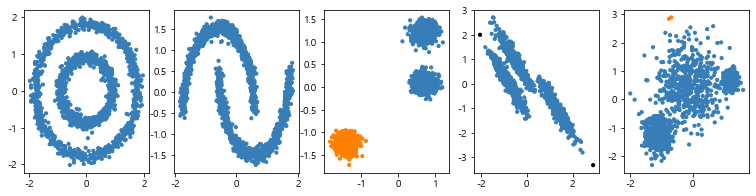

In [74]:
fig, axes = plt.subplots(ncols=5, figsize=(13,3))

for i in range(2):
    dbscan = DBSCAN(min_samples=2, eps=0.5)
    clusters = dbscan.fit_predict(X_scaled[i])

    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                 '#f781bf', '#a65628', '#984ea3',
                                 '#999999', '#e41a1c', '#dede00']),
                          int(max(clusters) + 1))))

    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])

    axes[i].scatter(X_scaled[i][:, 0], X_scaled[i][:, 1], s=10, color=colors[clusters])

for i in range(2,5):
    dbscan = DBSCAN(min_samples=2, eps=0.5)
    clusters = dbscan.fit_predict(X_scaled[i])

    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                 '#f781bf', '#a65628', '#984ea3',
                                 '#999999', '#e41a1c', '#dede00']),
                          int(max(clusters) + 1))))

    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])

    axes[i].scatter(X_scaled[i][:, 0], X_scaled[i][:, 1], s=10, color=colors[clusters])


- 군집이 대체로 1개 형성되는 것을 보면, eps 0.5는 scaled된 data에 있어서 큰 값임을 알 수 있었습니다. 

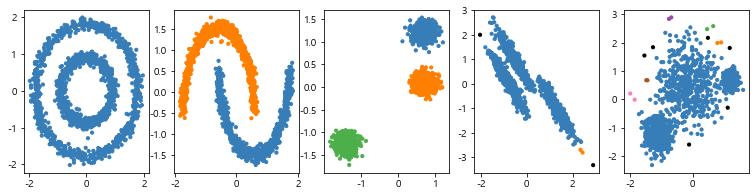

In [71]:
fig, axes = plt.subplots(ncols=5, figsize=(13,3))

for i in range(2):
    dbscan = DBSCAN(min_samples=2, eps=0.3)
    clusters = dbscan.fit_predict(X_scaled[i])

    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                 '#f781bf', '#a65628', '#984ea3',
                                 '#999999', '#e41a1c', '#dede00']),
                          int(max(clusters) + 1))))

    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])

    axes[i].scatter(X_scaled[i][:, 0], X_scaled[i][:, 1], s=10, color=colors[clusters])

for i in range(2,5):
    dbscan = DBSCAN(min_samples=2, eps=0.3)
    clusters = dbscan.fit_predict(X_scaled[i])

    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                 '#f781bf', '#a65628', '#984ea3',
                                 '#999999', '#e41a1c', '#dede00']),
                          int(max(clusters) + 1))))

    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])

    axes[i].scatter(X_scaled[i][:, 0], X_scaled[i][:, 1], s=10, color=colors[clusters])


- eps가 0.3일 때, `moons`와 `blobs` 데이터의 경우에는 군집을 잘 형성합니다. 그러나 다른 데이터에 있어서는 여전히 성능이 좋지 않은 것을 볼 수 있습니다. 

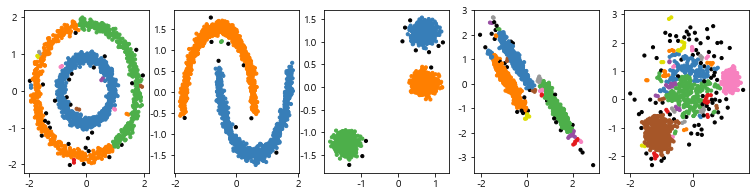

In [72]:
fig, axes = plt.subplots(ncols=5, figsize=(13,3))

for i in range(2):
    dbscan = DBSCAN(min_samples=2, eps=0.1)
    clusters = dbscan.fit_predict(X_scaled[i])

    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                 '#f781bf', '#a65628', '#984ea3',
                                 '#999999', '#e41a1c', '#dede00']),
                          int(max(clusters) + 1))))

    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])

    axes[i].scatter(X_scaled[i][:, 0], X_scaled[i][:, 1], s=10, color=colors[clusters])

for i in range(2,5):
    dbscan = DBSCAN(min_samples=2, eps=0.1)
    clusters = dbscan.fit_predict(X_scaled[i])

    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                 '#f781bf', '#a65628', '#984ea3',
                                 '#999999', '#e41a1c', '#dede00']),
                          int(max(clusters) + 1))))

    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])

    axes[i].scatter(X_scaled[i][:, 0], X_scaled[i][:, 1], s=10, color=colors[clusters])


- eps가 0.1일 때 `circles`와 `varied`를 제외하고는 비교적 잘 군집을 형성하였습니다. 또한 의미있는 것은 `aniso` 데이터의 경우 앞선 알고리즘에서는 좋은 성능을 얻질 못하였는데, DBSCAN 알고리즘에서는 비교적 좋은 성능을 보여주었습니다. 

#### eps = 0.1 고정, min_samples 변화 (2-> 3 -> 5)

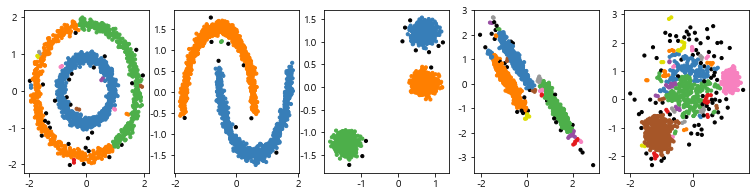

In [77]:
fig, axes = plt.subplots(ncols=5, figsize=(13,3))

for i in range(2):
    dbscan = DBSCAN(min_samples=2, eps=0.1)
    clusters = dbscan.fit_predict(X_scaled[i])

    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                 '#f781bf', '#a65628', '#984ea3',
                                 '#999999', '#e41a1c', '#dede00']),
                          int(max(clusters) + 1))))

    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])

    axes[i].scatter(X_scaled[i][:, 0], X_scaled[i][:, 1], s=10, color=colors[clusters])

for i in range(2,5):
    dbscan = DBSCAN(min_samples=2, eps=0.1)
    clusters = dbscan.fit_predict(X_scaled[i])

    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                 '#f781bf', '#a65628', '#984ea3',
                                 '#999999', '#e41a1c', '#dede00']),
                          int(max(clusters) + 1))))

    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])

    axes[i].scatter(X_scaled[i][:, 0], X_scaled[i][:, 1], s=10, color=colors[clusters])


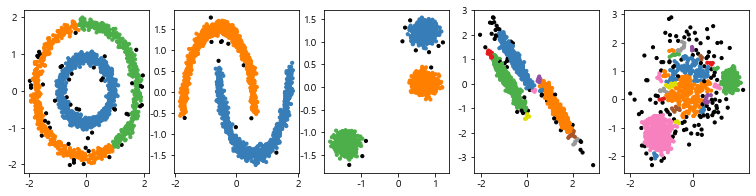

In [78]:
fig, axes = plt.subplots(ncols=5, figsize=(13,3))

for i in range(2):
    dbscan = DBSCAN(min_samples=3, eps=0.1)
    clusters = dbscan.fit_predict(X_scaled[i])

    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                 '#f781bf', '#a65628', '#984ea3',
                                 '#999999', '#e41a1c', '#dede00']),
                          int(max(clusters) + 1))))

    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])

    axes[i].scatter(X_scaled[i][:, 0], X_scaled[i][:, 1], s=10, color=colors[clusters])

for i in range(2,5):
    dbscan = DBSCAN(min_samples=3, eps=0.1)
    clusters = dbscan.fit_predict(X_scaled[i])

    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                 '#f781bf', '#a65628', '#984ea3',
                                 '#999999', '#e41a1c', '#dede00']),
                          int(max(clusters) + 1))))

    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])

    axes[i].scatter(X_scaled[i][:, 0], X_scaled[i][:, 1], s=10, color=colors[clusters])


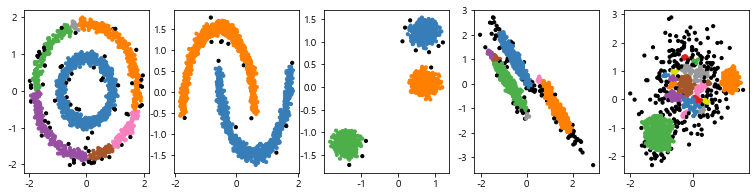

In [94]:
fig, axes = plt.subplots(ncols=5, figsize=(13,3))

for i in range(2):
    dbscan = DBSCAN(min_samples=5, eps=0.1)
    clusters = dbscan.fit_predict(X_scaled[i])

    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                 '#f781bf', '#a65628', '#984ea3',
                                 '#999999', '#e41a1c', '#dede00']),
                          int(max(clusters) + 1))))

    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])

    axes[i].scatter(X_scaled[i][:, 0], X_scaled[i][:, 1], s=10, color=colors[clusters])

for i in range(2,5):
    dbscan = DBSCAN(min_samples=5, eps=0.1)
    clusters = dbscan.fit_predict(X_scaled[i])

    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                 '#f781bf', '#a65628', '#984ea3',
                                 '#999999', '#e41a1c', '#dede00']),
                          int(max(clusters) + 1))))

    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])

    axes[i].scatter(X_scaled[i][:, 0], X_scaled[i][:, 1], s=10, color=colors[clusters])


- min_samples를 2->3->5 순으로 변화시키면, noise로 판단되는 포인트가 증가하였습니다. 그러나 eps처럼 현저하게 변화되는 모습을 보이진 않았습니다. 개인적인 생각으로는 min_samples 보다 eps를 조정하는 것이 군집의 개수를 제어하는 데 큰 영향을 미치는 것 같습니다. 

## 5) 이외의 다른 클러스터링 결과 비교

- 스펙트럴 군집화(Spectral Clustering)
: 개체간의 거리를 가지고 만든 인접행렬을 활용해 클러스터링

- 유사도 전파 군집화(Affinity Propagation Clustering)
: 모든 데이터가 특정한 기준에 따라 자신을 대표할 대표 데이터를 선택합니다. 만약 스스로가 자기 자신을 대표하게 되면 클러스터의 중심이 됩니다. 

In [103]:
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import SpectralClustering, AffinityPropagation

import warnings
warnings.filterwarnings(action='ignore')

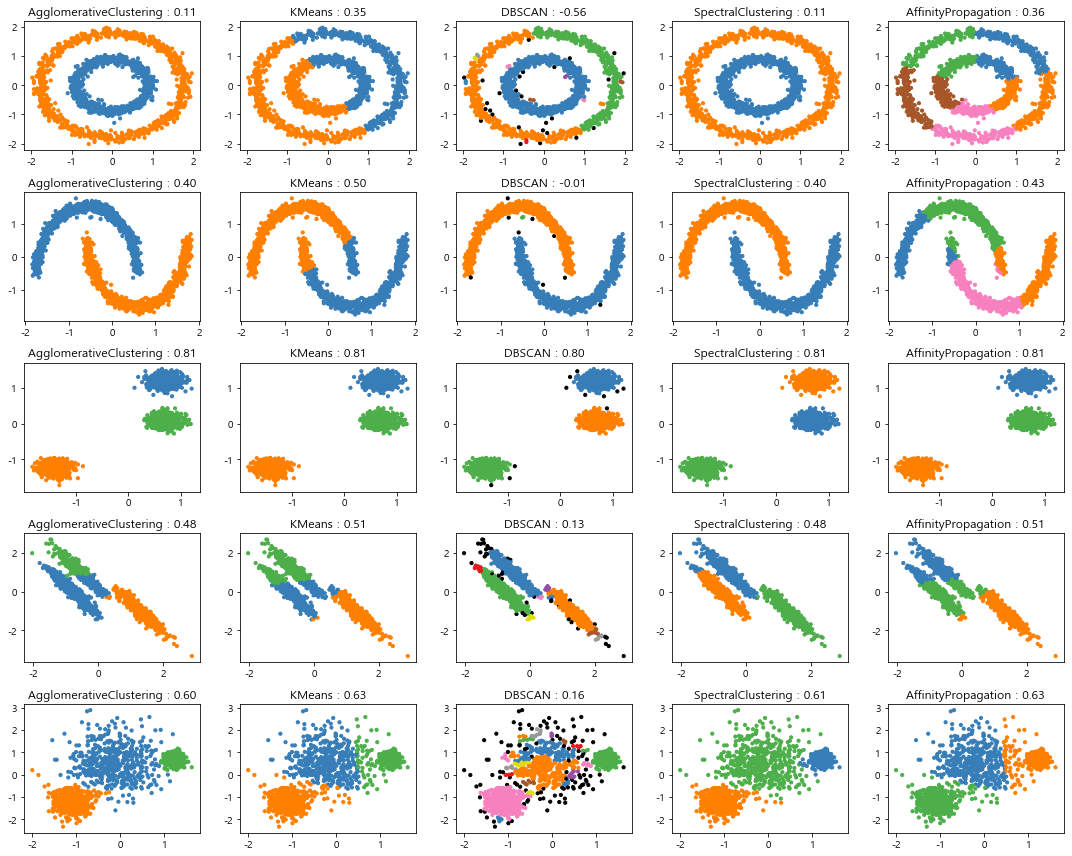

In [110]:
fig, axes = plt.subplots(5, 5, figsize=(15,12))

# cluster 2개인 데이터셋
algorithms = [AgglomerativeClustering(n_clusters=2, linkage='single'), 
             KMeans(n_clusters=2), 
             DBSCAN(min_samples=2, eps=0.1), 
             SpectralClustering(n_clusters=2, affinity='nearest_neighbors'),
             AffinityPropagation(damping=0.9, preference=-200)]

for i in range(2):
    for j in range(5):
        clusters = algorithms[j].fit_predict(X_scaled[i])

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(clusters) + 1))))

        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"]) 

        axes[i][j].scatter(X_scaled[i][:,0], X_scaled[i][:,1], color = colors[clusters], s=10)
        axes[i][j].set_title('{} : {:.2f}'.format(algorithms[j].__class__.__name__,
                                         silhouette_score(X_scaled[i], clusters)))
        

# cluster 3개인 데이터셋
algorithms = [AgglomerativeClustering(n_clusters=3, linkage='ward'), 
             KMeans(n_clusters=3), 
             DBSCAN(min_samples=3, eps=0.1), 
             SpectralClustering(n_clusters=3, affinity='nearest_neighbors'),
             AffinityPropagation(damping=0.9, preference=-200)]

for i in range(2,5):
    for j in range(5):
        clusters = algorithms[j].fit_predict(X_scaled[i])

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(clusters) + 1))))

        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"]) 

        axes[i][j].scatter(X_scaled[i][:,0], X_scaled[i][:,1], color = colors[clusters], s=10)
        axes[i][j].set_title('{} : {:.2f}'.format(algorithms[j].__class__.__name__,
                                         silhouette_score(X_scaled[i], clusters)))
        
fig.tight_layout()

## 6) 결과 정리 

- `circles` 데이터는 **single linkage의 Hierarchical Clustering** 또는 **Spectral Clustering**을 적용했을 때 군집이 적절하게 형성되었습니다. 
- `moons` 데이터는 **single linkage의 Hierarchical Clustering**, **DBSCAN**, **Spectral Clustering** 을 적용했을 때 군집이 적절하게 형성되었습니다. 
- `blobs` 데이터는 모든 알고리즘이 적용 가능하였습니다. 
- `aniso` 데이터는 **eps가 작은 DBSCAN** 또는 **Spectral Clustering**을 적용했을 때 군집이 적절하게 형성되었습니다. 
- `varied` 데이터는 **ward linkage의 Hierarchical Clustering**와 **Spectral Clustering**이 가장 성능이 좋았고 그 다음으로는 **K-means**와 **Affinity Propagation** 의 성능이 좋았습니다. 

<br>

- 길게 늘어진 형태의 데이터는 single linkage의 Hierarchical Clustering을 적용하면 좋을 것 같고, 군집 간 거리가 밀접하면서도 방향이 왜곡된 비슷한 군집 크기의 데이터의 경우에는 DBSCAN을, 크기가 다른 원형의 데이터의 경우에는 ward linkage의 Hierarchical Clustering을 적용하면 좋을 것 같습니다. 

<br>

- 그러나 Spectral Clustering은 대체적으로 모든 데이터에서 우수한 성능을 보여주었습니다. 